# HEART CONDITION ANALYSIS
The following dataset provides information regarding gender, age, various diseases, and smoking habits. With this information we could be able to predict whether a patient is likely to get a stroke based on the parameters given as well as getting some insides about which parameters are more relevant or somewhat relevant 
The following dataset provides information regarding gender, age, various diseases, and smoking habits. With this information we could be able to predict whether a patient is likely to get a stroke based on the parameters given as well as getting some insights regarding which parameters are somewhat relevant.
The dataset was found here: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# Information about the dataset 
Here is a description about the data set columns 

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

# 1- Importing the libraries that we are going to use 
We decided to use seaborn because of its flexibility and the different graphs that we could use in order to plot the data more clearly. Regarding the other libraries, they are considered madatory if we want to perform a complete and clean analysis of the following dataset.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 1.1- Getting all the descriptive statistics of the data set 
In this part are located all the statistics of the data set such as: average age, the amount of smokers in this dataset, etc... 

In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 2.1- Who took part in this study?

We use seaborn to count the quantity of males and females in the data set.  

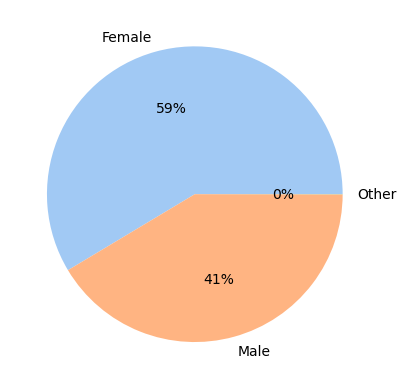

In [4]:
data_p = []
labels_p = ["Female","Male","Other"]
male_p = data[data["gender"]=="Male"]
female_p = data[data["gender"]=="Female"]
other_p =data[data["gender"]=="Other"]
data_p.append(len(female_p)/len(data))
data_p.append(len(male_p)/len(data))
data_p.append(len(other_p)/len(data))

colors = sns.color_palette("pastel")[0:5]
plt.pie(data_p, labels = labels_p, colors = colors, autopct='%.0f%%')
plt.show()


# 2.2- How many patients had a stroke?  
As we can see in the graph above, in this data set the majority of people haven't had a stroke. 

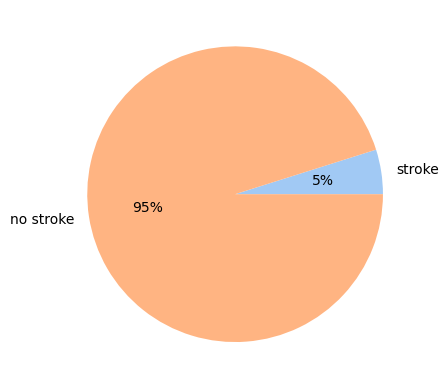

In [5]:
data_stroke= []
stroke_p = len(data[data["stroke"]==1])/len(data)
data_stroke.append(stroke_p)

no_stroke = len(data[data["stroke"]==0])/len(data)
data_stroke.append(no_stroke)
labels = ["stroke","no stroke"]
colors = sns.color_palette('pastel')[0:5]
plt.pie(data_stroke, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()



The vast majority of the patients who took part in this study never had a stroke as shown in the piechart above. 

#  2.3- Which gender experienced an higher stroke rate?

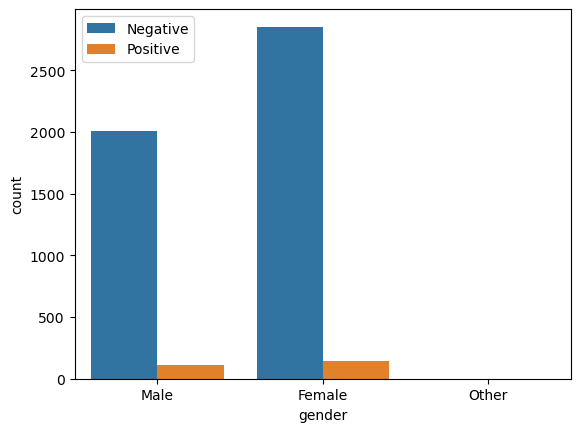

In [6]:
sns.countplot(x='gender',hue='stroke',data=data)
plt.legend(labels=['Negative','Positive'])

# 3- Density distribution of the data set variables
In this section we are going to analyse the graphs of the quantitative variables.  

# 3.1- Density distribution of the average glucose level in the dataset
In the graph above we create using seaborn a distribution graph of the average glucose level, this can give us a lot of information regarding this variable such as the fact that the graph is right skewed. Moreover, the mode, median and mean can be deducted from the graph; however, the results wouldn't be very accurate because there is no certainty of it being totally right skewed. To obtain more precise values is therefore suggested using DataFrame.mean() and so on.

C:\Users\Gio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

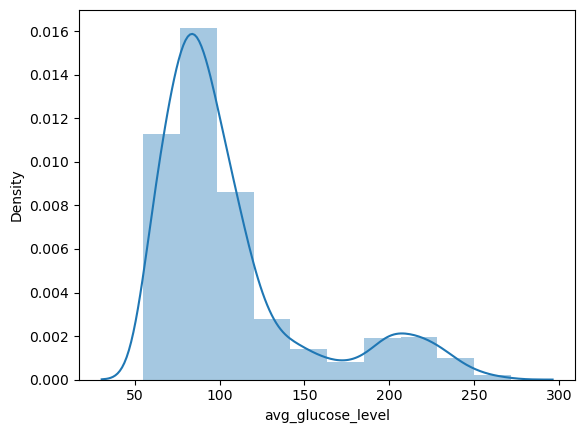

In [7]:
sns.distplot(data['avg_glucose_level'],bins=10)

In [8]:
data['avg_glucose_level'].mean()



106.14767710371804

In [9]:
data['avg_glucose_level'].median()

91.88499999999999

In [10]:
data['avg_glucose_level'].mode()

0    93.88
Name: avg_glucose_level, dtype: float64

Using the mean fuction on the column "avg_glucose_level" we can notice that it is somewhat close to the one on the graph so we can conclude that the density distribution graph behaves like a right skewed graph. Now let's check the meadian, mode and so on, but this time adding more more bins.

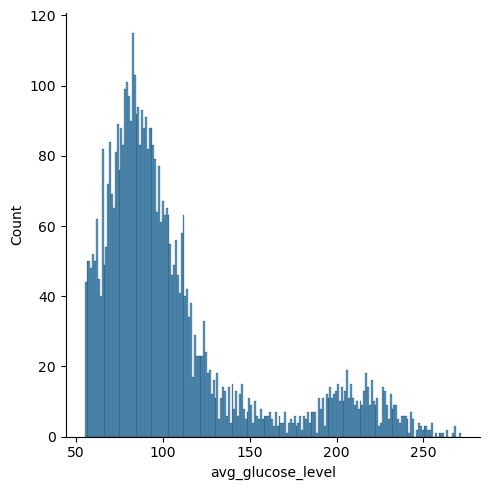

In [11]:
sns.displot(data['avg_glucose_level'],bins=200)

Adding more bins we can conclude that the graphs tends to be more right skewed but, to show this fenomenon in a clearer way, let's add even more bins. 

C:\Users\Gio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

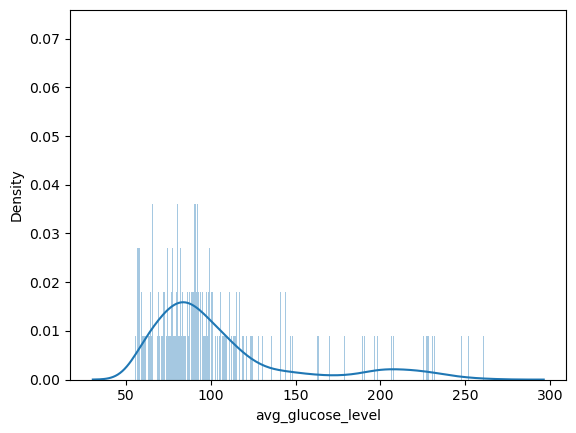

In [12]:
sns.distplot(data['avg_glucose_level'],bins=10000)

As we can see, the graph tends to be right skewed (even though there are some outliners).

# 3.2- Density distribution of the bmi 

In [ ]:
sns.distplot(data['bmi'],bins=1000)

C:\Users\Gio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

this graphs has a normal distribution, knowing that we can continue  gettting the statistics 

In [ ]:
data['bmi'].mean()

In [ ]:
data['bmi'].median()

In [ ]:
data['bmi'].mode()

# 3.3- Density distribution of the age

In [ ]:
sns.distplot(data['age'],bins=100)

In [ ]:
data['age'].mean()

In [ ]:
data['age'].mode()

In [ ]:
data['age'].median()

# 3.4- Average glucose level of people who already had a stroke
In this case we are showing only the people who had a stroke to see how much does the graph change. 


In [ ]:
stroke_p = data[data["stroke"] == 1]
sns.distplot(stroke_p['avg_glucose_level'],bins=20)


# 3.5- Average age of people who already had a stroke



# 

In [ ]:
sns.distplot(stroke_p['age'],bins=20)

# 3.6- Average BMI of people who already had a stroke

In [ ]:
sns.distplot(stroke_p['bmi'],bins=20)

# 4- Analysis of the impact of the area where people live on heart conditions 

In [ ]:
sns.countplot(x='Residence_type',hue='stroke',data=data)

In [ ]:
life_urbn = data[data["Residence_type"]== "Urban"]
life_urbn['stroke'].value_counts()

In [ ]:
life_rural = data[data["Residence_type"] == "Rural"]
life_rural['stroke'].value_counts()

Here we see how many people living in rural and urban areas have had a stroke. 
What we notice is that the number of patients who had a stroke and live in the rural area is smaller that the ones living in the urban area. 
However, in order to be sure that the urban population had more strokes, we need do the following: 


The fraction $\frac{114}{2400+114}$ for the rural part and  $\frac{135}{2461+135}$ for the urban part to see the percentange of people that had a stroke in both residential zones 




if we do the calculations we obtain the the 4.5% of people in the rural zone had a stroke and a 5.2 % of the people in an urban zone had a stroke, with this simple calculation we can deduce that people in urban areas 

# 5- Scatter plot for some variables
# 5.1- Scatter plot showing the relationship between strokes and the age variable
In this section we will display an scatter plot of the stroke variable and some relevant variables. 

In [ ]:
plt.scatter(x=data["stroke"],y=data["age"])
plt.xlabel("stroke")
plt.ylabel("age")

plt.show()

As we can see, the data is separted. However, what we can deduce from this graph is that the majority of people didn't have a stroke but the majority of those who did were on the range of 40-80 year old people, not taking in consideration some outliners. 

# 5.2-  Scatter plot of the stroke and BMI variable 

In [ ]:



plt.scatter(x=data["stroke"],y=data["bmi"])
plt.xlabel("stroke")
plt.ylabel("bmi")

plt.show()

This graph is not so different from the last one. However, we can get some insights such as the people that got a stroke are between the range from 20 to 60 years old. 

As we can see there are four cluster in this graph and it shows that the probability of a patient to have hypertension is not cnesseary correlated to the fact that the patient had an stroke 

# 10- Final overview showing the correlation between all the variables 

We decided to use a heat map to describe the correlation between each variable.


In [ ]:
plt.figure(figsize=(27,16))
sns.heatmap(data.corr(),annot=True)


# 10.1- Description of the heat map
The rightmost line shows a range between 1 and 0, each color represents the value of the correlation between the variables.
We use this heatmap to describe the correlation between each variable of the data set 